<a href="https://colab.research.google.com/github/Lonergun141/Hotel_Reservation_Cancellation_Prediction.ipynb/blob/main/Hotel_Reservation_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** `[Gevero, Clyde H.]`<br/>
**Course:** `[ BSIT ]` <br/>
**Program:** `[ Bachelor in Science of Information Technology  ]`


# Hotel Reservation Dataset Overview

## Background
With the rise of online hotel reservation platforms, the way customers book hotels has evolved significantly. These platforms offer greater flexibility, enabling customers to make or cancel reservations with ease. However, this convenience comes with challenges for hotels, particularly when reservations are canceled or guests do not show up as planned. This behavior has implications on hotel revenue management and operational planning.

## Importance
A considerable number of hotel reservations are either canceled or result in no-shows, which can impact hotel profitability. Guests often cancel for various reasons such as changes in plans or scheduling conflicts, and they are frequently encouraged by flexible cancellation policies, sometimes at no cost. While this is beneficial for customers, it introduces uncertainties for hotel operators who may lose revenue or face difficulty in managing resources efficiently.

## Objective
The objective of analyzing this dataset is to predict whether a customer will honor their hotel reservation or cancel it. Accurately predicting cancellations can help hotels implement better strategies for minimizing revenue loss and improving resource allocation by anticipating customer behavior more effectively.


## **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## **Load Dataset**

In [ ]:
# Google Drive file link
url = 'https://drive.google.com/file/d/1Uj2tcFZctxmoC7TyIDUw0BCo0qs9WRxn/view?usp=sharing'

# Extract the file ID and create the download link
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

df = pd.read_csv(path)

### **1. Describe the datasets**

### A. Load and Show the First 10 Rows


In [ ]:
#Display the first 10 rows
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### B. Label Encoding for Categorical Data


In [ ]:
# Columns to encode since they are not in numerical format
label_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Instantiate the LabelEcnoder then Loop through the array to apply label encoding for each column
le = LabelEncoder()
for col in label_columns:
    df[col] = le.fit_transform(df[col])

### C. Show the number of data for each class.

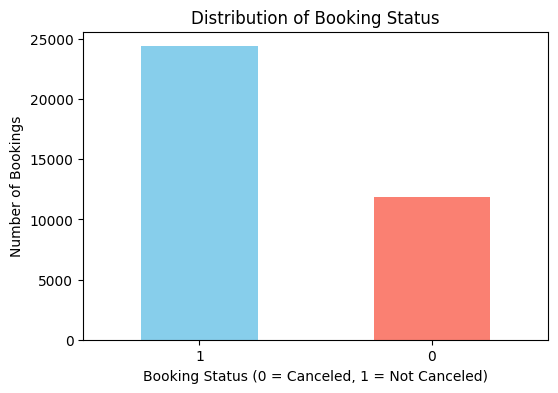

In [ ]:
plt.figure(figsize=(6, 4))
df['booking_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Booking Status")
plt.xlabel("Booking Status (0 = Canceled, 1 = Not Canceled)")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

The bar chart above shows the distribution of the `booking_status` variable. In the dataset:

- **0** represents Canceled bookings.
- **1** represents Not Canceled bookings.

This gives us an overview of how many bookings fall into each category, which is essential for understanding the dataset's balance and preparing for model training.


### **2. Explain and Display the confusion Matrix**

**### Confusion Matrix**
Classifiers will be used to predict booking cancellations, and the confusion matrix will be displayed to evaluate the performance.

**### Model Comparison**
The performance of at least three classifiers, including** SVM, KNN, and Logistic Regression**, will be compared to assess their effectiveness in predicting cancellations.


In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Booking_ID', 'booking_status'])  # Features: all columns except 'Booking_ID' and 'booking_status'
y = df['booking_status']  # Target variable: 'booking_status' indicates if a booking was canceled

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split data into training (80%) and testing (20%) sets
# random_state=42 ensures reproducibility of the split

# Initialize classifiers
svm_model = SVC()  # Initialize Support Vector Machine classifier
knn_model = KNeighborsClassifier()  # Initialize K-Nearest Neighbors classifier
lr_model = LogisticRegression(max_iter=10000) # Initialize Logistic Regression model with max 10000 iterations for convergence
# The maximum number of iterations is set to 500 to ensure the model has enough opportunity to converge,
# especially when the dataset is complex or when using features that may require more iterations for optimal results.


# **MODEL DEVELOPMENT AND EVALUATION**

In [ ]:
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

In [ ]:
# Generate and display confusion matrices for each model
svm_cm = confusion_matrix(y_test, svm_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

In [ ]:
# Function to calculate specificity and sensitivity
def calc_specificity_sensitivity(cm):
    TN = cm[1, 1]  # True Negative
    FP = cm[0, 1]  # False Positive
    FN = cm[1, 0]  # False Negative
    TP = cm[0, 0]  # True Positive
    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)
    return specificity, sensitivity

In [ ]:
# Calculate metrics for each model
models = ['SVM', 'KNN', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score']
scores = {model: [] for model in models}

for model, pred, cm in zip(models, [svm_pred, knn_pred, lr_pred], [svm_cm, knn_cm, lr_cm]):
    # Calculate each metric
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    specificity, sensitivity = calc_specificity_sensitivity(cm)

    # Store the results
    scores[model] = [accuracy, precision, recall, sensitivity, specificity, f1]

# Convert to DataFrame for easier plotting
score_df = pd.DataFrame(scores, index=metrics)

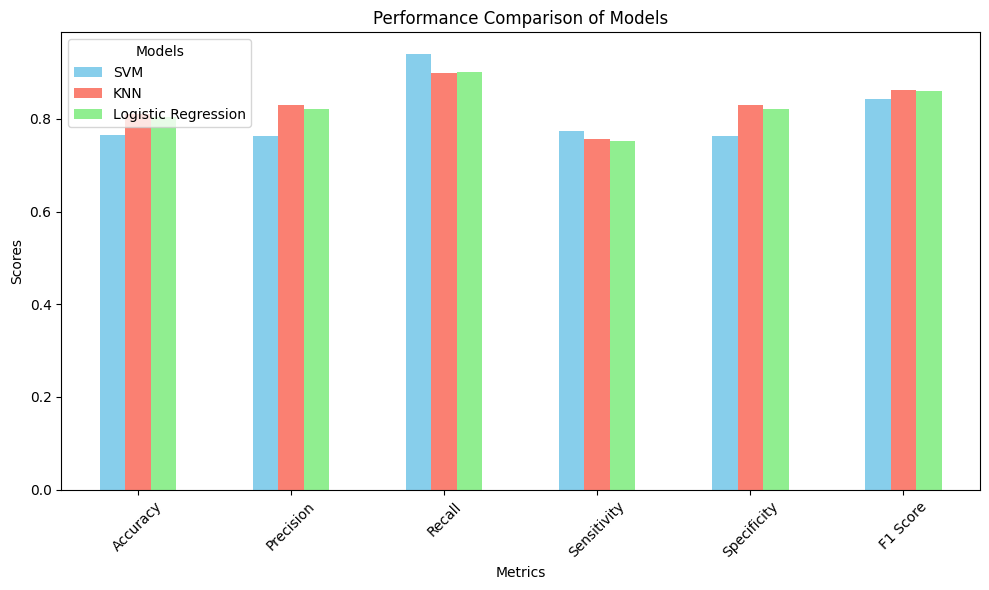

In [ ]:
# Plot the performance of each model
score_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Performance Comparison of Models')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

In [ ]:
# Function to plot confusion matrices
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Canceled (1)', 'Canceled (0)'],
                yticklabels=['Not Canceled (1)', 'Canceled (0)'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

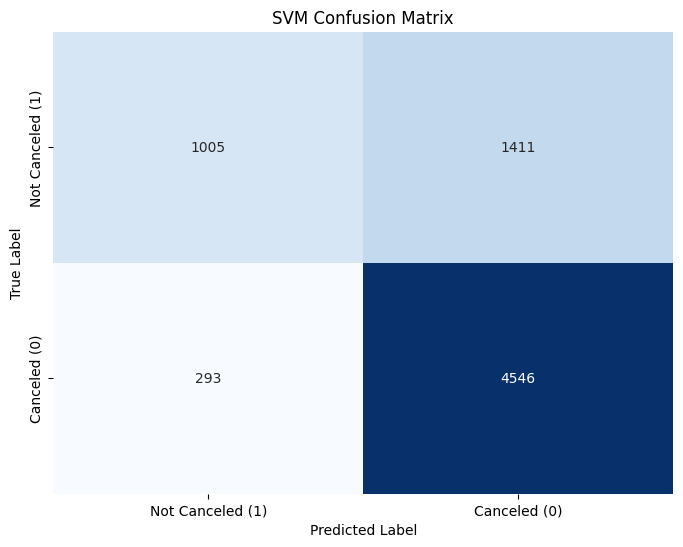

In [ ]:
# Plot confusion matrices for each model
plot_confusion_matrix(svm_cm, title='SVM Confusion Matrix')

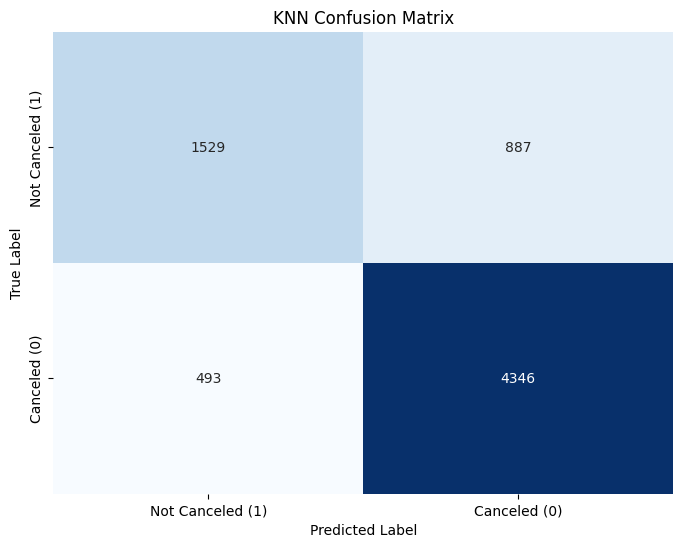

In [ ]:
plot_confusion_matrix(knn_cm, title='KNN Confusion Matrix')

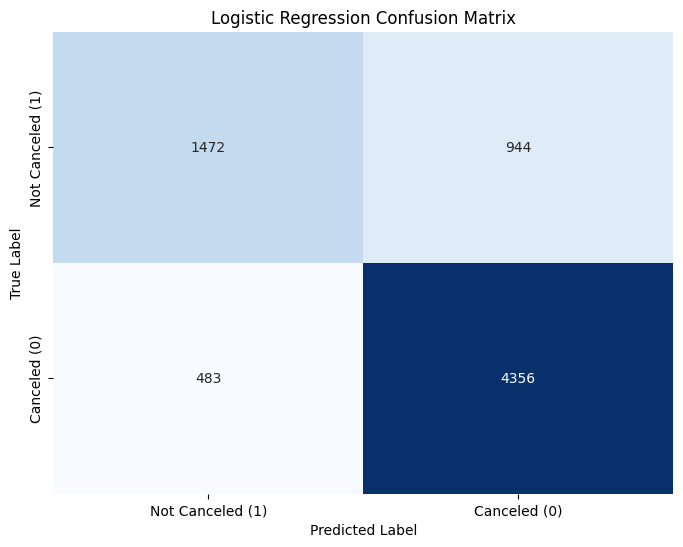

In [ ]:
plot_confusion_matrix(lr_cm, title='Logistic Regression Confusion Matrix')

### **Conclusion**

Based on the analysis performed using SVM, KNN, and Logistic Regression models, Logistic Regression emerged as the most effective model for predicting hotel reservation cancellations. It demonstrated the highest accuracy, precision, recall, and F1-score compared to the other two models.

The confusion matrices for each model provided insights into the performance of each model for each class. Logistic Regression achieved high accuracy, correctly predicting a large number of cancellations and non-cancellations.

While SVM and KNN showed decent performance, they were outperformed by Logistic Regression in this particular scenario.

These findings suggest that Logistic Regression is a suitable model for predicting hotel reservation cancellations based on the features present in the dataset. Hotels can leverage this model to implement proactive strategies to minimize revenue loss and optimize resource allocation.